# Selecting Dataset - Sleem in Mammals



In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("volkandl/sleep-in-mammals")

print("Path to dataset files:", path)


c:\Users\matan\anaconda3\envs\courses\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\matan\.cache\kagglehub\datasets\volkandl\sleep-in-mammals\versions\1


In [2]:
import pandas as pd
# !pip install seaborn
import seaborn as sns

import matplotlib.pyplot as plt
import kagglehub

# Download latest version
path = kagglehub.dataset_download("volkandl/sleep-in-mammals")

# Load the dataset
df = pd.read_csv(f"{path}/mammals.csv")

missing_values = df.isnull().sum()
print(missing_values)



species          0
body_wt          0
brain_wt         0
non_dreaming    14
dreaming        12
total_sleep      4
life_span        4
gestation        4
predation        0
exposure         0
danger           0
dtype: int64


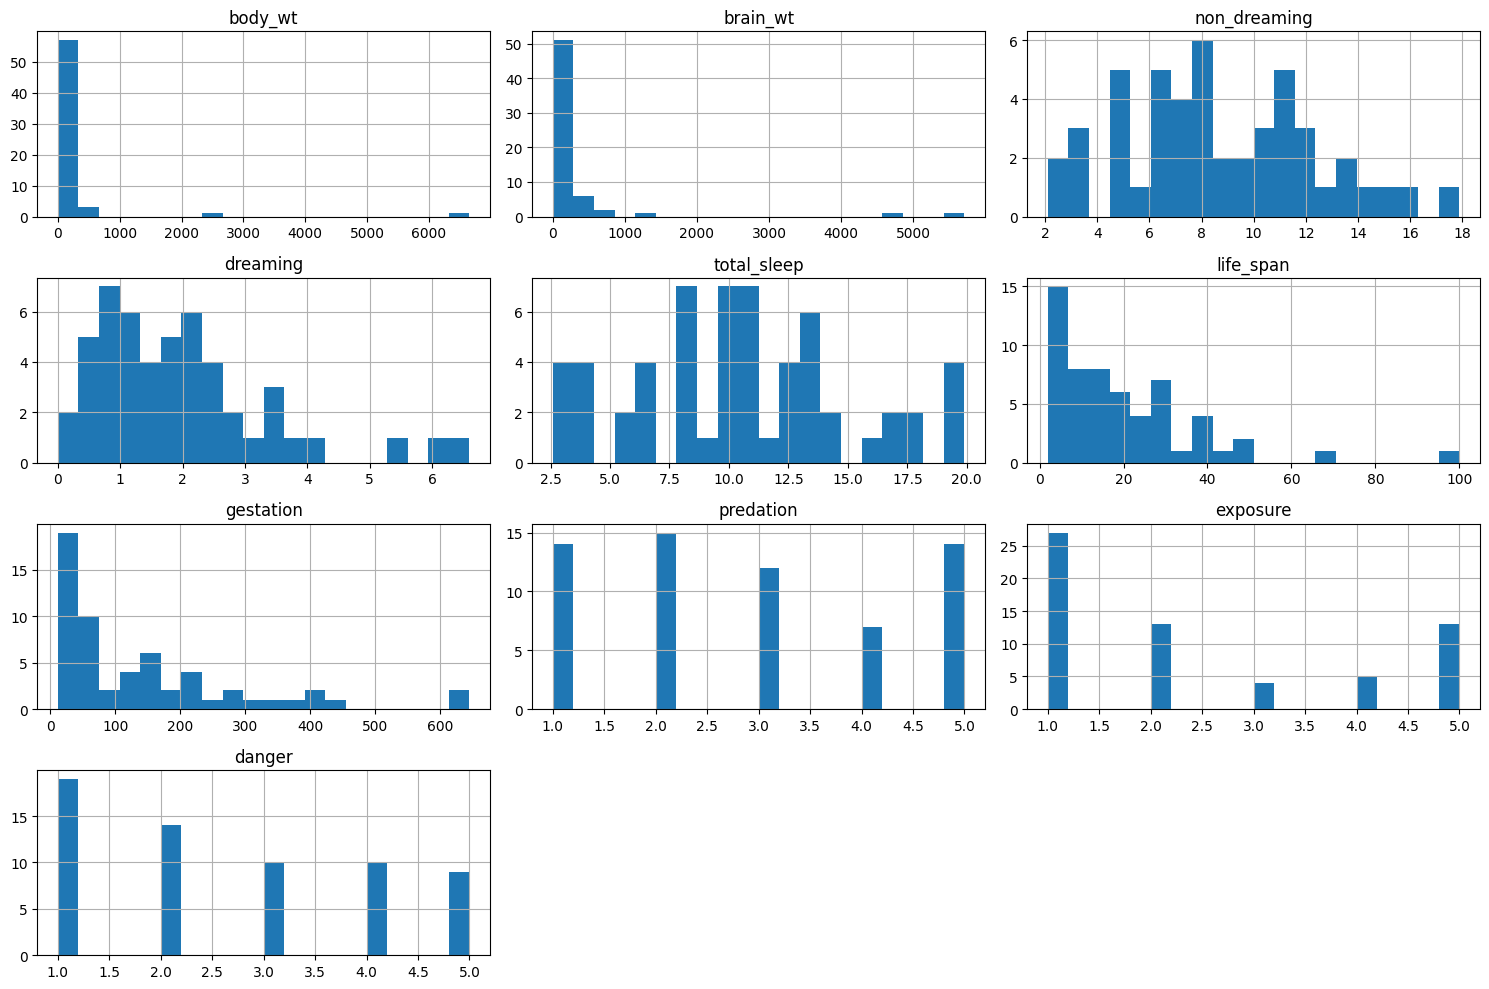

In [3]:
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

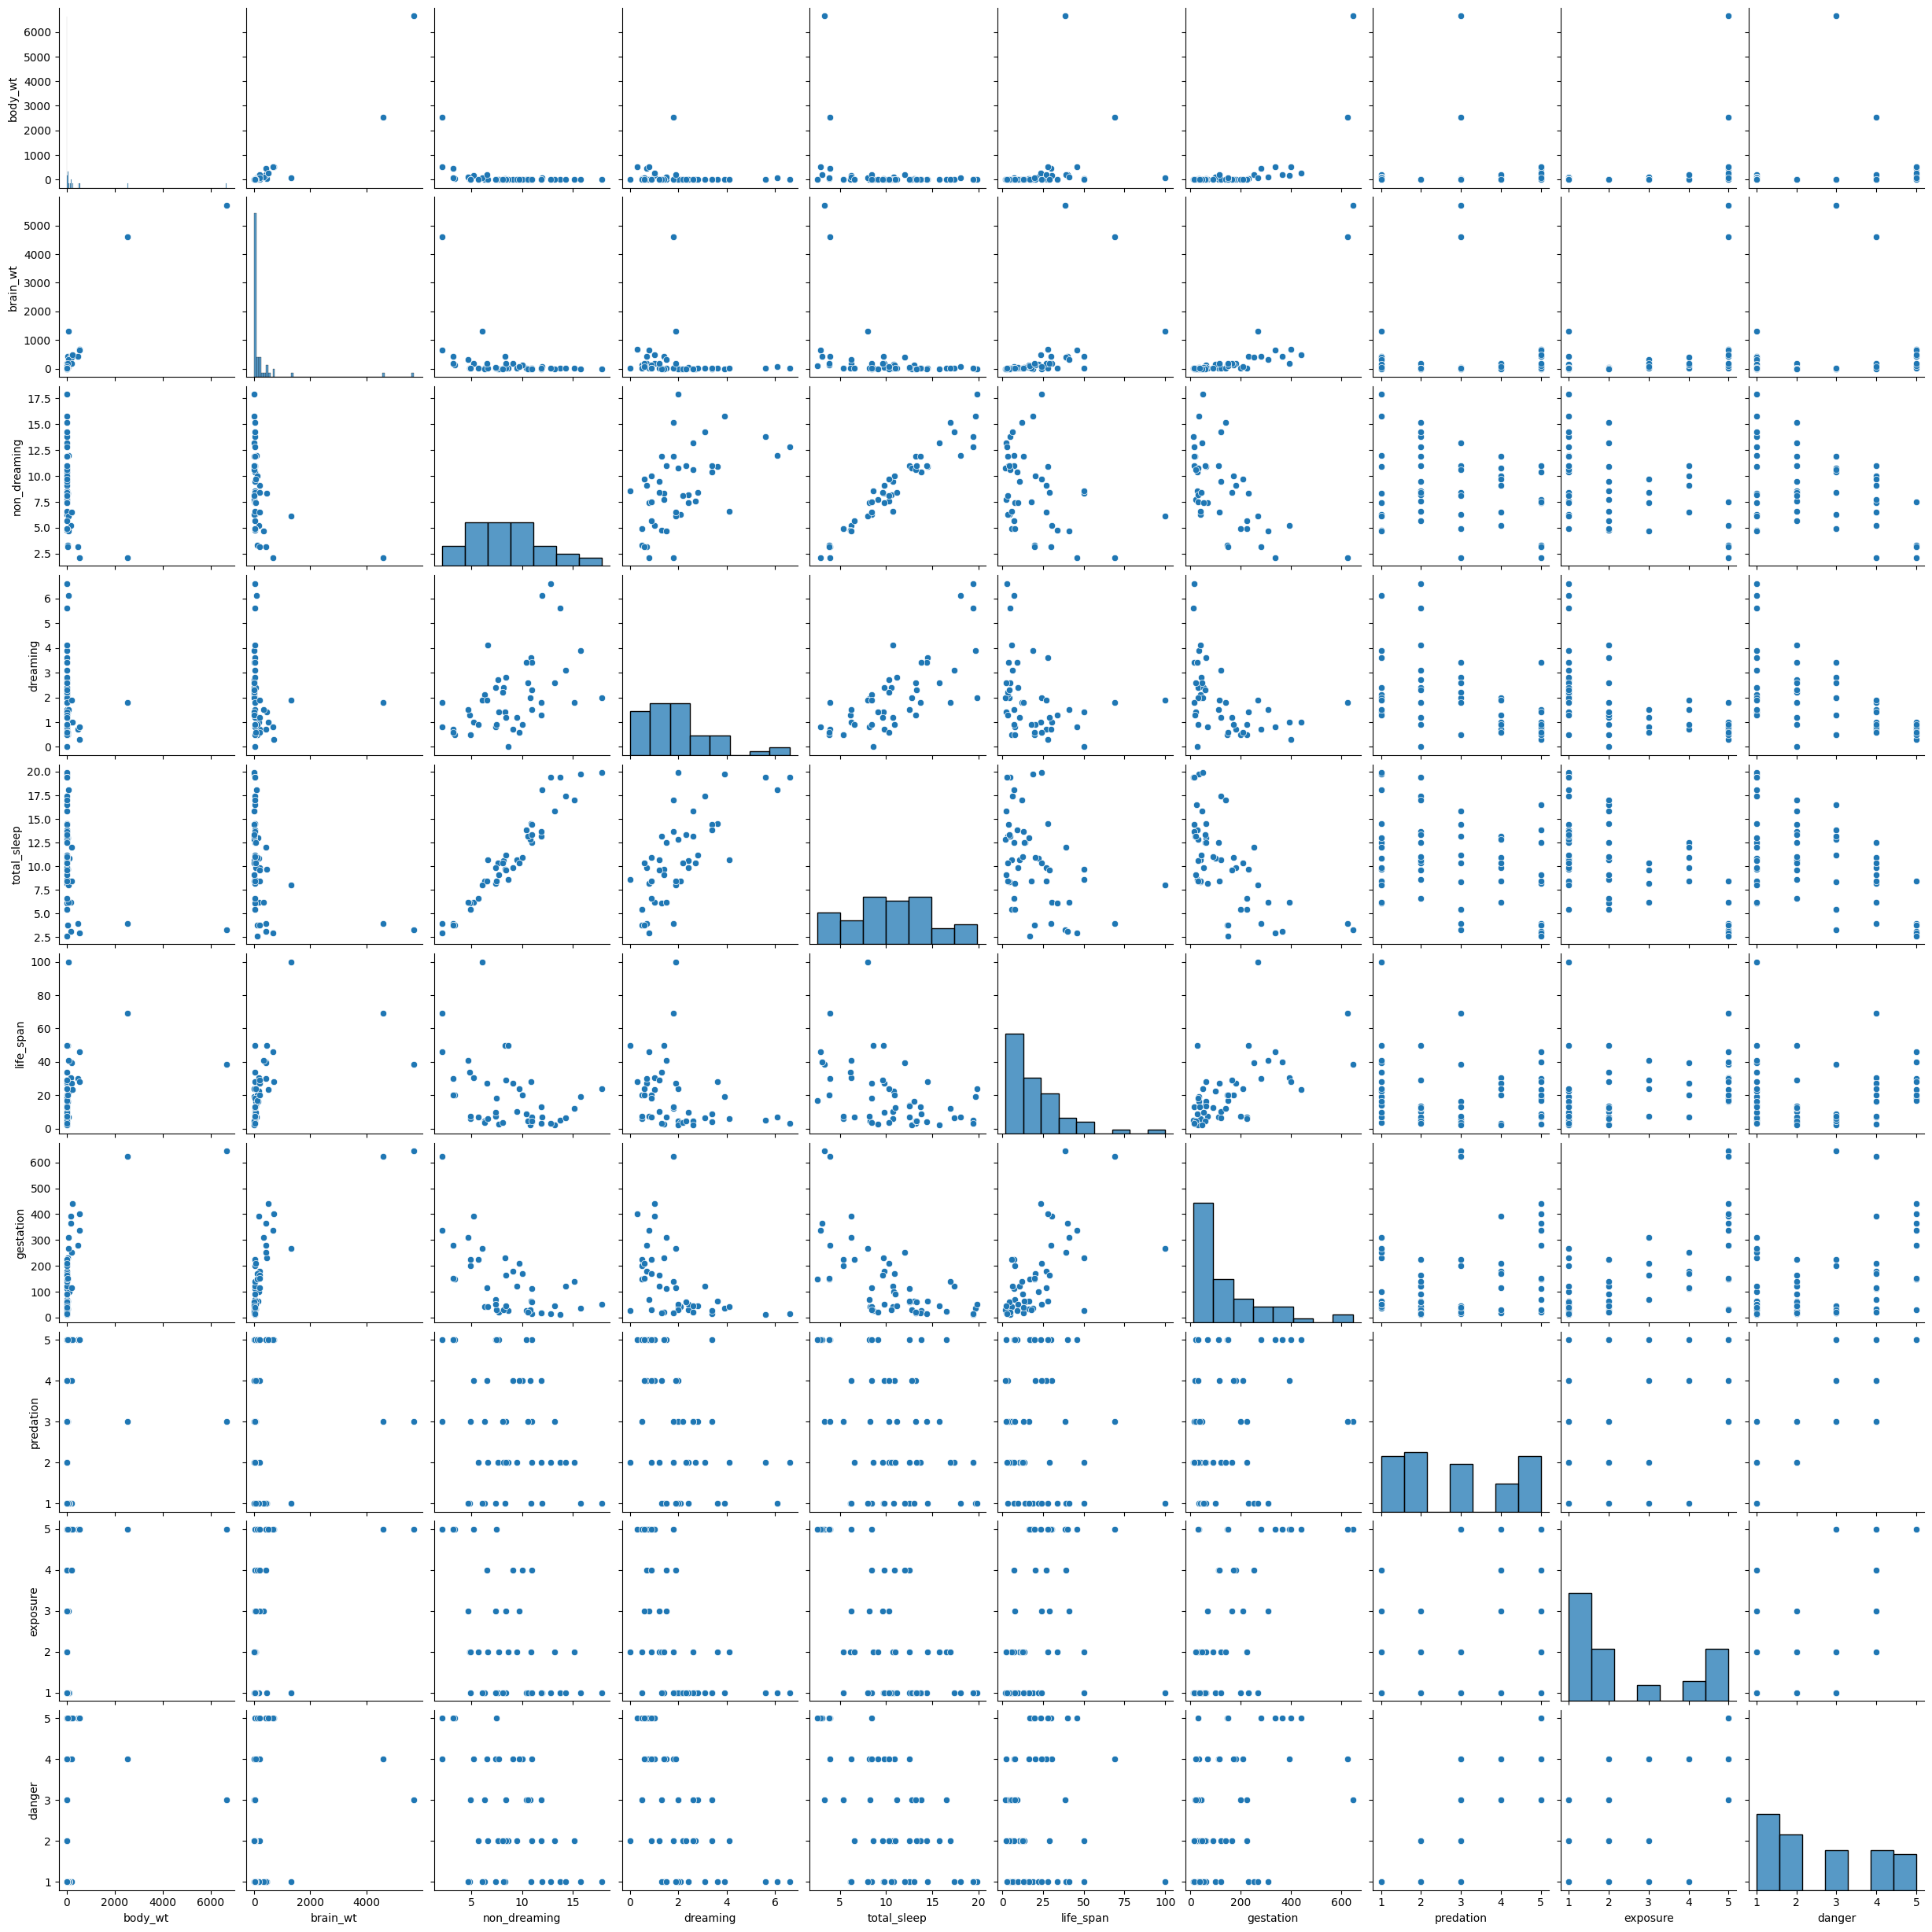

In [4]:
sns.pairplot(df)
plt.show()

In [5]:
def df_missing_value_indicator(df, feature_name):
    missing_indicator_name = f"{feature_name}_missing_indicator"
    df[missing_indicator_name] = df[feature_name].isnull().astype(int)
    return df

df_dreaming_indicator = df_missing_value_indicator(df, "dreaming")
df_no_null = df_dreaming_indicator.dropna(axis=0)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


def train_logistic_regression(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create and train the logistic regression model
    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train, y_train)

    # Make predictions
    y_pred = log_reg.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)


# Define the features and target variable
X = df_no_null.drop(columns=['species', 'danger'])
y_train = df_no_null['danger']
train_logistic_regression(X, y_train)


Accuracy: 0.6153846153846154
Confusion Matrix:
[[2 0 0 0 0]
 [1 2 0 0 0]
 [0 0 0 0 0]
 [0 0 2 2 1]
 [0 0 1 0 2]]
Classification Report:
              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       1.00      0.67      0.80         3
           3       0.00      0.00      0.00         0
           4       1.00      0.40      0.57         5
           5       0.67      0.67      0.67         3

    accuracy                           0.62        13
   macro avg       0.67      0.55      0.57        13
weighted avg       0.87      0.62      0.68        13



c:\Users\matan\anaconda3\envs\courses\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\matan\anaconda3\envs\courses\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\matan\anaconda3\envs\courses\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and b

In [7]:
df_dreaming_indicator.columns


Index(['species', 'body_wt', 'brain_wt', 'non_dreaming', 'dreaming',
       'total_sleep', 'life_span', 'gestation', 'predation', 'exposure',
       'danger', 'dreaming_missing_indicator'],
      dtype='object')

In [8]:
def balance_df(df, column_name):
# Separate the rows where dreaming_missing_indicator is 1 and 0
    df_1 = df[df[column_name] == 1]
    df_0 = df[df[column_name] == 0]

    # Calculate the number of rows to duplicate
    num_to_duplicate = len(df_0) - len(df_1)

    # Duplicate the rows
    df_1_duplicated = df_1.sample(n=num_to_duplicate, replace=True)

    # Concatenate the original dataframe with the duplicated rows
    df_balanced = pd.concat([df, df_1_duplicated])

    # Shuffle the dataframe
    df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

    print(df_balanced[column_name].value_counts())
    return df_balanced

In [9]:
missing_columns = ['dreaming', 'non_dreaming', 'total_sleep', 'life_span', 'gestation']
for column in missing_columns:
    print('trying to predict:', column)
    df_with_indicator = df_missing_value_indicator(df, column)
    df_balanced = df_with_indicator.copy()
    X = df_balanced.drop(columns=['species', 'danger', column, f'{column}_missing_indicator'])
    X  = X.fillna(X.mean())
    y_train = df_balanced['dreaming_missing_indicator']
    train_logistic_regression(X, y_train)
    print('\n\n')

c:\Users\matan\anaconda3\envs\courses\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


trying to predict: dreaming
Accuracy: 0.6842105263157895
Confusion Matrix:
[[13  0]
 [ 6  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        13
           1       0.00      0.00      0.00         6

    accuracy                           0.68        19
   macro avg       0.34      0.50      0.41        19
weighted avg       0.47      0.68      0.56        19




trying to predict: non_dreaming


c:\Users\matan\anaconda3\envs\courses\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\matan\anaconda3\envs\courses\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7894736842105263
Confusion Matrix:
[[12  1]
 [ 3  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.75      0.50      0.60         6

    accuracy                           0.79        19
   macro avg       0.78      0.71      0.73        19
weighted avg       0.78      0.79      0.78        19




trying to predict: total_sleep
Accuracy: 0.8421052631578947
Confusion Matrix:
[[12  1]
 [ 2  4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.80      0.67      0.73         6

    accuracy                           0.84        19
   macro avg       0.83      0.79      0.81        19
weighted avg       0.84      0.84      0.84        19




trying to predict: life_span
Accuracy: 0.7894736842105263
Confusion Matrix:
[[12  1]
 [ 3  3]]
Classification Report:
             

# Wine Quality Database

## Preprocces and understand the dataset

In [81]:
import kagglehub
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')


# Download latest version
path = kagglehub.dataset_download("taweilo/wine-quality-dataset-balanced-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\matan\.cache\kagglehub\datasets\taweilo\wine-quality-dataset-balanced-classification\versions\1


In [82]:
wine_df = pd.read_csv(f"{path}/wine_data.csv")
wine_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,9.797079,0.774796,0.793870,31.289348,0.200245,129.442333,229.008762,1.009972,3.158712,1.020641,11.291716,6.000000
std,2.413919,0.365015,0.384833,19.015391,0.124933,77.167262,100.183265,0.012032,0.171371,0.408304,1.182198,2.000048
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,7.600000,0.430000,0.410000,9.800000,0.072000,45.000000,150.000000,0.997417,3.030000,0.620000,10.400000,4.000000
50%,10.000000,0.830000,0.870000,37.600000,0.205000,145.800000,240.500000,1.012200,3.150000,1.080000,11.300000,6.000000
75%,11.800000,1.080000,1.110000,46.800000,0.298000,194.325000,311.625000,1.019840,3.270000,1.360000,12.200000,8.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<Axes: >

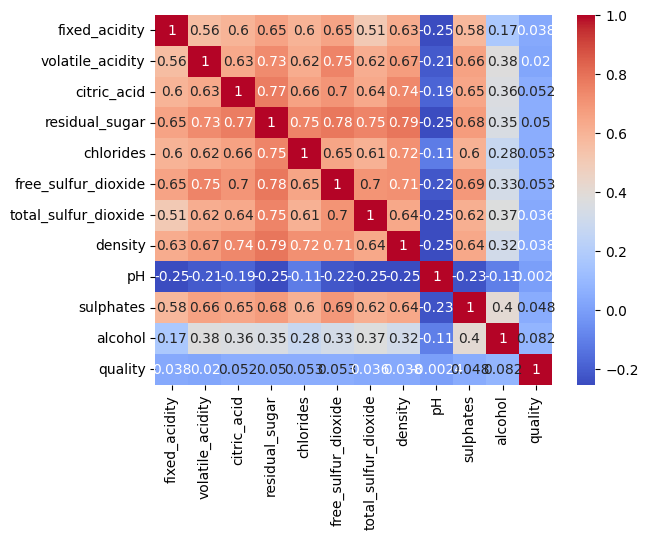

In [83]:
sns.heatmap(wine_df.corr(), annot=True, cmap='coolwarm')

## Train a Model to classify the wine quality

In [113]:
y_train = wine_df['quality']-3
X = wine_df.drop(columns=['quality'])
X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.2, random_state=42)

In [115]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

def find_best_hyperparameters(X_train, y_train):
    # Define objective function for Optuna optimization
    def objective(trial):
        # Hyperparameter search space
        # param_grid = {
        #     'max_depth': trial.suggest_int('max_depth', 3, 10),
        #     'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        #     'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        #     'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        #     'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        #     'gamma': trial.suggest_float('gamma', 0, 1),
        #     'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        #     'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 1)
        # }
        
        # # Create and train the XGBClassifier with the suggested hyperparameters
        # model = XGBClassifier(
        #     objective='multi:softmax',  # For multiclass classification
        #     num_class=7,               # Number of classes
        #     eval_metric='mlogloss',     # Multiclass log loss
        #     use_label_encoder=False,   # Avoid warnings in newer XGBoost versions
        #     **param_grid
        # )
        
        param_grid = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 200),
            'max_depth': trial.suggest_int('max_depth', 3, 20),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
            'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
        }

        model = RandomForestClassifier(**param_grid)
        # Cross-validation for performance estimation
        score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        return score.mean()  # Return the mean accuracy

    # Set up and run Optuna study
    study = optuna.create_study(direction='maximize')  # We want to maximize accuracy
    study.optimize(objective, n_trials=10)  # Perform optimization over 50 trials

    # Get the best hyperparameters found by Optuna
    best_params = study.best_params
    print(f"Best Hyperparameters: {best_params}")
    return best_params
best_params = find_best_hyperparameters(X_train, y_train)

[I 2025-02-05 10:22:39,905] A new study created in memory with name: no-name-19a16f93-d57c-4545-8b35-429c2b7d96b2
[I 2025-02-05 10:22:46,107] Trial 0 finished with value: 0.31660714285714286 and parameters: {'n_estimators': 159, 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 6, 'bootstrap': True}. Best is trial 0 with value: 0.31660714285714286.
[I 2025-02-05 10:23:11,317] Trial 1 finished with value: 0.4741071428571429 and parameters: {'n_estimators': 102, 'max_depth': 13, 'min_samples_split': 10, 'min_samples_leaf': 9, 'bootstrap': False}. Best is trial 1 with value: 0.4741071428571429.
[I 2025-02-05 10:23:24,113] Trial 2 finished with value: 0.3602976190476191 and parameters: {'n_estimators': 86, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 4, 'bootstrap': False}. Best is trial 1 with value: 0.4741071428571429.
[I 2025-02-05 10:23:52,214] Trial 3 finished with value: 0.4554761904761905 and parameters: {'n_estimators': 184, 'max_depth': 11, 'min_samples_sp

Best Hyperparameters: {'n_estimators': 132, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 8, 'bootstrap': False}


In [116]:
# Train the model with the best hyperparameters
# best_params =  {'max_depth': 10, 'learning_rate': 0.23823396572274735, 'n_estimators': 141, 'subsample': 0.8506979064285252, 'colsample_bytree': 0.821175777812565, 'gamma': 0.25413966716433245, 'reg_alpha': 0.736930567486492, 'reg_lambda': 0.34870051923508893}
# best_model = XGBClassifier(
#     objective='multi:softmax', 
#     num_class=7, 
#     eval_metric='mlogloss', 
#     use_label_encoder=False,
#     **best_params
# )

best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.5821


In [117]:
# Get feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the sorted features with their importances
print(features_df)

                 Feature  Importance
0         residual_sugar    0.148855
1                density    0.139949
2    free_sulfur_dioxide    0.109774
3              chlorides    0.099891
4                alcohol    0.087669
5       volatile_acidity    0.079833
6              sulphates    0.078516
7            citric_acid    0.074966
8   total_sulfur_dioxide    0.070864
9                     pH    0.055097
10         fixed_acidity    0.054586


In [16]:
print(wine_df.columns)
wine_df.describe()

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,9.797079,0.774796,0.793870,31.289348,0.200245,129.442333,229.008762,1.009972,3.158712,1.020641,11.291716,6.000000
std,2.413919,0.365015,0.384833,19.015391,0.124933,77.167262,100.183265,0.012032,0.171371,0.408304,1.182198,2.000048
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,7.600000,0.430000,0.410000,9.800000,0.072000,45.000000,150.000000,0.997417,3.030000,0.620000,10.400000,4.000000
50%,10.000000,0.830000,0.870000,37.600000,0.205000,145.800000,240.500000,1.012200,3.150000,1.080000,11.300000,6.000000
75%,11.800000,1.080000,1.110000,46.800000,0.298000,194.325000,311.625000,1.019840,3.270000,1.360000,12.200000,8.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Remove values and classify the missingness type

In [118]:
from missing_clf import *

target_feature = 'quality'
null_feature = 'volatile_acidity'
role_feature = 'fixed_acidity'
missing_cond = lambda x: x[x[null_feature] > np.mean(x[null_feature])]


In [119]:
from missing_clf import classify_missing_values

# new_df = remove_at_random(wine_df, null_feature, 0.3, missing_cond)
new_df = remove_complitly_at_random(wine_df, null_feature, 0.7)
# new_df = remove_not_at_random(df_full, null_feature, 0.3, missing_cond, null_feature)

print('number of removed values:', new_df[null_feature].isnull().sum())
acc = classify_missing_values(new_df, null_feature)
acc

number of removed values: 14699
(8821, 11)
Classifier Accuracy: 0.5040994445913779
Classifier Confusion Matrix:
[[938 999]
 [876 968]]
Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.48      0.50      1937
           1       0.49      0.52      0.51      1844

    accuracy                           0.50      3781
   macro avg       0.50      0.50      0.50      3781
weighted avg       0.50      0.50      0.50      3781

classifier accuracy is 0.5040994445913779 - MCAR/MNAR


0.5040994445913779

In [120]:
percentage_values = [0.1, 0.3, 0.5, 0.7]
results = []
target_feature = 'quality'
null_features = wine_df.columns.drop(target_feature)
role_feature = 'fixed_acidity'
dataset_name = 'wine_quality'
for null_feature in null_features:
    for percentage in percentage_values:
        print(f"----- percentage={percentage} -----")
        # Remove at random
        df_at_random = remove_at_random(wine_df, null_feature, percentage, lambda x: x[x[null_feature] > np.mean(x[null_feature])])
        acc_at_random = classify_missing_values(df_at_random, null_feature)
        results.append({'null feature': null_feature, 'dataset': dataset_name, 'percentage': percentage, 'method': 'remove_at_random', 'accuracy': acc_at_random})

        # Remove completely at random
        df_completely_at_random = remove_complitly_at_random(wine_df, null_feature, percentage)
        acc_completely_at_random = classify_missing_values(df_completely_at_random, null_feature)
        results.append({'null feature': null_feature, 'dataset': dataset_name, 'percentage': percentage, 'method': 'remove_completely_at_random', 'accuracy': acc_completely_at_random})



----- percentage=0.1 -----
(1548, 11)
Classifier Accuracy: 0.6219879518072289
Classifier Confusion Matrix:
[[164 173]
 [ 78 249]]
Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.49      0.57       337
           1       0.59      0.76      0.66       327

    accuracy                           0.62       664
   macro avg       0.63      0.62      0.62       664
weighted avg       0.63      0.62      0.61       664

classifier accuracy is 0.6219879518072289 - MCAR/MNAR
(2940, 11)
Classifier Accuracy: 0.5015873015873016
Classifier Confusion Matrix:
[[299 338]
 [290 333]]
Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.47      0.49       637
           1       0.50      0.53      0.51       623

    accuracy                           0.50      1260
   macro avg       0.50      0.50      0.50      1260
weighted avg       0.50      0.50      0.50   

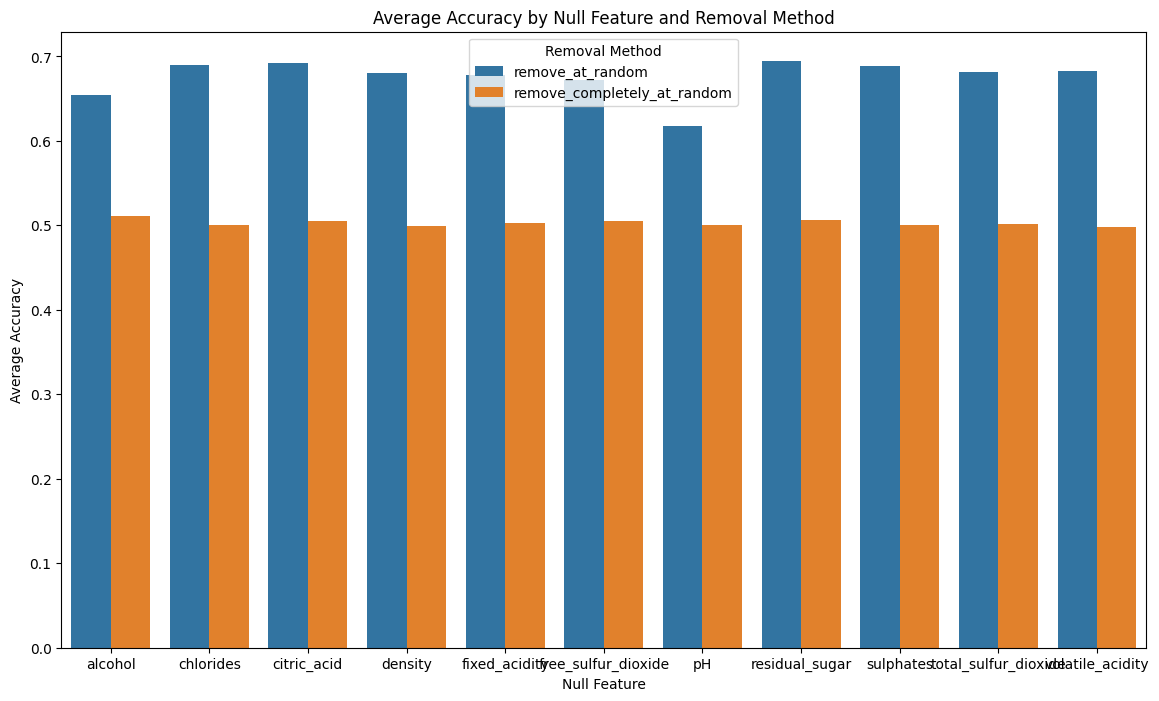

In [121]:
def plot_MAR_MCAR_accuracy(results_df):
    # Calculate the average accuracy for each null_feature and method
    avg_results = results_df.groupby(['null feature', 'method'])['accuracy'].mean().reset_index()

    # Plot the results
    plt.figure(figsize=(14, 8))
    sns.barplot(x='null feature', y='accuracy', hue='method', data=avg_results)

    # Add labels and title
    plt.xlabel('Null Feature')
    plt.ylabel('Average Accuracy')
    plt.title('Average Accuracy by Null Feature and Removal Method')
    plt.legend(title='Removal Method')

    # Show the plot
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)
plot_MAR_MCAR_accuracy(results_df)

## Use different impute methods to increase the accuracy of the predicting model

In [50]:
y_train = wine_df['quality']-3
X = wine_df.drop(columns=['quality'])
X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.2, random_state=42)

In [122]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

def wine_test_train_sets(df):
    y_train = df['quality']-3
    X = df.drop(columns=['quality'])
    X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# null_feature = 'fixed_acidity'
feature_importances_by_null_feature = []
percentage = 0.5
for null_feature in null_features:

    print(f"\n\nnull_feature: {null_feature}")
    
    missing_cond = lambda x: x[x[null_feature] > np.mean(x[null_feature])]
    df_partial = remove_at_random(wine_df, null_feature, percentage, missing_cond)

    # Step 1: Remove the column with the null feature from df_partial
    df_partial_no_null_feature = df_partial.drop(columns=[null_feature])
    X_train_partial, X_test_partial, y_train_partial, y_test = wine_test_train_sets(df_partial_no_null_feature)

    # Step 2: Train an XGBoost model using best_params on the modified dataset

    # best_params =  {'max_depth': 10, 'learning_rate': 0.23823396572274735, 'n_estimators': 141, 'subsample': 0.8506979064285252, 'colsample_bytree': 0.821175777812565, 'gamma': 0.25413966716433245, 'reg_alpha': 0.736930567486492, 'reg_lambda': 0.34870051923508893}
    # model_partial = XGBClassifier(
    #     objective='multi:softmax', 
    #     num_class=7, 
    #     eval_metric='mlogloss', 
    #     use_label_encoder=False,
    #     **best_params
    # )

    best_params = {'n_estimators': 132, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 8, 'bootstrap': False}
    model_partial = RandomForestClassifier(**best_params)
    model_partial.fit(X_train_partial, y_train_partial)

    # Step 3: Evaluate the model on the test set
    y_pred_partial = model_partial.predict(X_test_partial)
    accuracy_removed_column = accuracy_score(y_test, y_pred_partial)
    print(f"Accuracy after removing the null feature column: {accuracy_removed_column:.4f}")

    # Step 4: Remove all rows with null values from df_partial
    df_partial_no_null_rows = df_partial.dropna()

    # Step 5: Train a new XGBoost model on the cleaned dataset
    X_train_cleaned, X_test, y_train_cleaned, y_test = wine_test_train_sets(df_partial_no_null_rows)

    model_cleaned = XGBClassifier(
        objective='multi:softmax', 
        num_class=7, 
        eval_metric='mlogloss', 
        use_label_encoder=False,
        **best_params
    )

    model_cleaned.fit(X_train_cleaned, y_train_cleaned)

    # Step 6: Evaluate the new model on the test set
    y_pred_cleaned = model_cleaned.predict(X_test)
    accuracy_removed_rows = accuracy_score(y_test, y_pred_cleaned)
    print(f"Accuracy after removing rows with null values: {accuracy_removed_rows:.4f}")

    feature_importances_by_null_feature.append({'null_feature': null_feature, 
                                                'accuracy_removed_column': accuracy_removed_column, 
                                                'accuracy_removed_rows': accuracy_removed_rows, 
                                                'percentage': percentage})



null_feature: fixed_acidity
Accuracy after removing the null feature column: 0.5795
Accuracy after removing rows with null values: 0.5473


null_feature: volatile_acidity
Accuracy after removing the null feature column: 0.5817
Accuracy after removing rows with null values: 0.5660


null_feature: citric_acid
Accuracy after removing the null feature column: 0.5793
Accuracy after removing rows with null values: 0.5792


null_feature: residual_sugar
Accuracy after removing the null feature column: 0.5752
Accuracy after removing rows with null values: 0.5522


null_feature: chlorides
Accuracy after removing the null feature column: 0.5743
Accuracy after removing rows with null values: 0.5729


null_feature: free_sulfur_dioxide
Accuracy after removing the null feature column: 0.5745
Accuracy after removing rows with null values: 0.5548


null_feature: total_sulfur_dioxide
Accuracy after removing the null feature column: 0.5845
Accuracy after removing rows with null values: 0.5776


null_fe

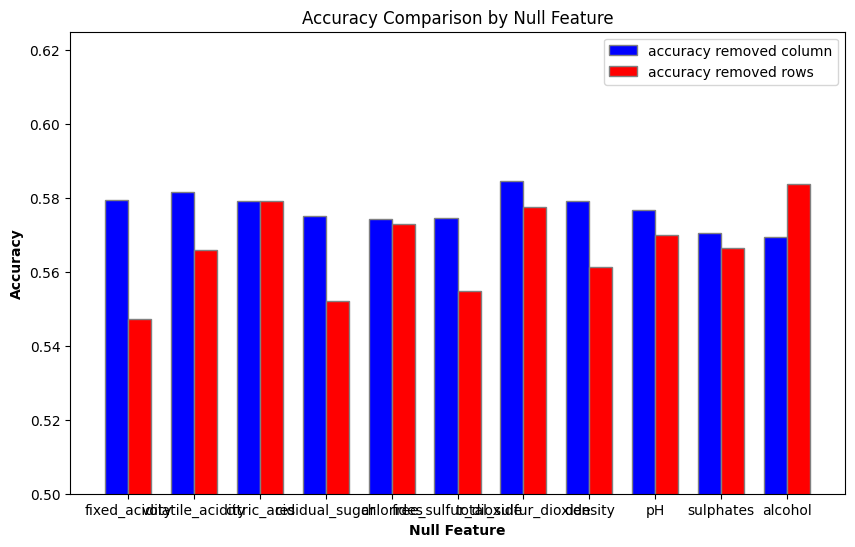

In [123]:
def plot_feature_importance(results_df):
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))

    # Set the bar width
    bar_width = 0.35

    # Set the positions of the bars on the x-axis
    r1 = range(len(results_df))
    r2 = [x + bar_width for x in r1]

    # Create bars
    ax.bar(r1, results_df['accuracy_removed_column'], color='b', width=bar_width, edgecolor='grey', label='accuracy removed column')
    ax.bar(r2, results_df['accuracy_removed_rows'], color='r', width=bar_width, edgecolor='grey', label='accuracy removed rows')

    # Add labels
    ax.set_xlabel('Null Feature', fontweight='bold')
    ax.set_ylabel('Accuracy', fontweight='bold')
    ax.set_title('Accuracy Comparison by Null Feature')
    ax.set_xticks([r + bar_width/2 for r in range(len(results_df))])
    ax.set_xticklabels(results_df['null_feature'])

    ax.set_ylim(0.5, 0.625)

    # Add legend
    ax.legend()

    # Show the plot
    plt.show()

# Convert results to DataFrame
feature_importance_df = pd.DataFrame(feature_importances_by_null_feature)
plot_feature_importance(feature_importance_df)

## Use different impute methods and validate thier impact

In [109]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

def model_pred_impute(df: pd.DataFrame) -> pd.DataFrame:
    # split data
    df = df.copy()
    missing_column = df.columns[df.isnull().any()].tolist()[0]
    missing_column_idx = df.columns.get_loc(missing_column)
    X, y = df.drop(columns=[missing_column]), df[missing_column]
    X_train, y_train = X[~y.isnull()], y[~y.isnull()]
    X_test = X[y.isnull()]
    
    best_params = find_best_hyperparameters(X_train, y_train)
    

    best_model = xgb.XGBRegressor(objective='reg:squarederror', **best_params)
    best_model.fit(X_train, y_train)
 
    mse = mean_squared_error(y_train, best_model.predict(X_train))
    r2 = best_model.score(X_train, y_train)
    print(f"Train MSE: {mse:.2f}")
    print(f"Train R^2: {r2:.2f}")
    
    # impute missing values
    y_imputed = best_model.predict(X_test)
    X_test.insert(missing_column_idx, missing_column, y_imputed)
    X_train.insert(missing_column_idx, missing_column, y_train)
    df = pd.concat([X_train, X_test])
    df = df.sort_index()
    return df

def impute_df(df, method):
    missing_columns = df.columns[df.isnull().any()].tolist()
    if len(missing_columns) == 0:
        return df
    missing_column = missing_columns[0]
    print(f"Found {df[missing_column].isnull().sum()} missing values in {missing_column}")
    
    df = df.copy()
    if method == 'drop_na':
        df = df.dropna()
    elif method == 'mean':
        df = df.fillna(df.mean())
    elif method == '0':
        df = df.fillna(0)
    elif method == 'model_pred':
        df = model_pred_impute(df)
    return df

In [110]:
null_feature = "residual_sugar"

def best_impute_method(df, null_feature, percentage=0.5):
    impute_method = ['drop_na', 'mean', '0', 'model_pred']
    missing_cond = lambda x: x[x[null_feature] > np.mean(x[null_feature])]
    X_train, X_test, y_train, y_test = wine_test_train_sets(df)
    X_train_null = remove_at_random(X_train, null_feature, percentage, missing_cond)
    imputed_results = []

    for method in impute_method:
        print("impute method:", method)
        # impute missing values
        X_train_imputed = impute_df(X_train_null, method)
        # y_train = y_train.loc[X_train_imputed.index]
        y_train_imputed = y_train.loc[y_train.index.intersection(X_train_imputed.index)]
    # Step 2: Train an XGBoost model using best_params on the modified dataset

        best_params =  {'max_depth': 10, 'learning_rate': 0.23823396572274735, 'n_estimators': 141, 'subsample': 0.8506979064285252, 'colsample_bytree': 0.821175777812565, 'gamma': 0.25413966716433245, 'reg_alpha': 0.736930567486492, 'reg_lambda': 0.34870051923508893}
        model = XGBClassifier(
            objective='multi:softmax', 
            num_class=7, 
            eval_metric='mlogloss', 
            use_label_encoder=False,
            **best_params
        )
        print(f"X_trian_imputed size={X_train_imputed.shape}, y_train size={y_train_imputed.shape}")

        model.fit(X_train_imputed, y_train_imputed)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        imputed_results.append({'null_feature': null_feature, 'method': method, 'accuracy': accuracy})
    return imputed_results

imputed_results = best_impute_method(wine_df, null_feature, 0.5)
        

impute method: drop_na
Found 5156 missing values in residual_sugar
X_trian_imputed size=(11644, 11), y_train size=(11644,)
impute method: mean
Found 5156 missing values in residual_sugar
X_trian_imputed size=(16800, 11), y_train size=(16800,)
impute method: 0
Found 5156 missing values in residual_sugar
X_trian_imputed size=(16800, 11), y_train size=(16800,)


[I 2025-02-05 10:14:38,915] A new study created in memory with name: no-name-2ee8e6f2-070a-474a-a2d1-a0472bc18a32
[W 2025-02-05 10:14:38,925] Trial 0 failed with parameters: {'max_depth': 8, 'learning_rate': 0.1903635663629101, 'n_estimators': 91, 'subsample': 0.8401628639422073, 'colsample_bytree': 0.8725232027706222, 'gamma': 0.021639069698386693, 'reg_alpha': 0.9394081730890418, 'reg_lambda': 0.9969609275402576} because of the following error: AttributeError("'super' object has no attribute '__sklearn_tags__'").
Traceback (most recent call last):
  File "c:\Users\matan\anaconda3\envs\courses\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\matan\AppData\Local\Temp\ipykernel_25800\1822435199.py", line 26, in objective
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
  File "c:\Users\matan\anaconda3\envs\courses\Lib\site-packages\sklearn\utils\_param_validation.py", line 216, in wrapp

impute method: model_pred
Found 5156 missing values in residual_sugar


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [103]:
print(imputed_results)

[{'null_feature': 'residual_sugar', 'method': 'drop_na', 'accuracy': 0.5111904761904762}, {'null_feature': 'residual_sugar', 'method': 'mean', 'accuracy': 0.6090476190476191}, {'null_feature': 'residual_sugar', 'method': '0', 'accuracy': 0.6102380952380952}, {'null_feature': 'residual_sugar', 'method': 'model_pred', 'accuracy': 0.14809523809523809}]


     null_feature      method  accuracy
0  residual_sugar     drop_na  0.511190
1  residual_sugar        mean  0.609048
2  residual_sugar           0  0.610238
3  residual_sugar  model_pred  0.148095


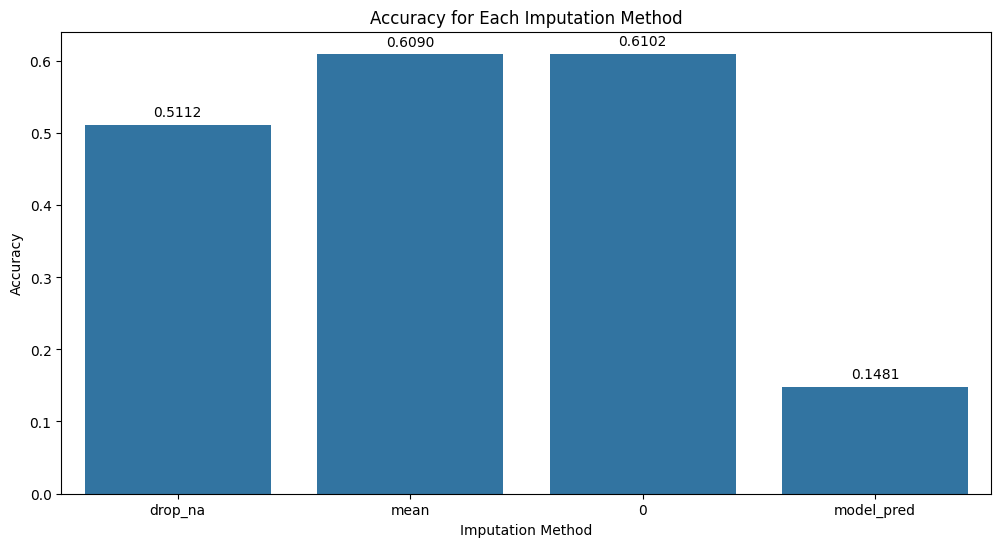

In [105]:
imputed_results_df = pd.DataFrame(imputed_results)
print(imputed_results_df)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='method', y='accuracy', data=imputed_results_df)
plt.xlabel('Imputation Method')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Imputation Method')

# Annotate the bars with the accuracy values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

# Energy Consumption - Database

1000


<Axes: >

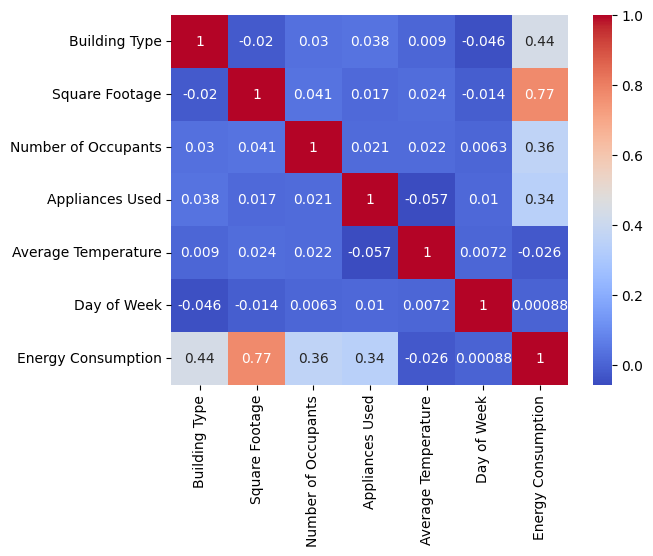

In [22]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
file_path = "/kaggle/input/energy-consumption-dataset-linear-regression/test_energy_data.csv"
# train_path = "input\energy_consumtion\\train_energy_data.csv"
# test_path = "input\energy-consumption\\test_energy_data.csv"
train_path = os.path.join('input', 'energy_consumtion', 'train_energy_data.csv')


def load_and_preprocess_data(file_path):    
    # Load the dataset
    data = pd.read_csv(file_path)

    # Map categorical features to numerical values
    building_type_map = {"Residential": 1, "Commercial": 2, "Industrial": 3}
    day_of_week_map = {"Weekday": 1, "Weekend": 0}

    data["Building Type"] = data["Building Type"].map(building_type_map)
    data["Day of Week"] = data["Day of Week"].map(day_of_week_map)
    return data

df = load_and_preprocess_data(train_path)
train_df, test_df = train_test_split(df, test_size=0.2)

# X_test = test_df.drop(columns=['Energy Consumption'])
# y_test = test_df['Energy Consumption']

print(len(df))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')


In [23]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import os
import seaborn as sns

def remove_complitly_at_random(df, feature_name, persentage):
    df = df.copy()
    n = int(df.shape[0] * persentage)
    df.loc[df.sample(n=n).index, feature_name] = None
    return df

def remove_at_random(df, feature_name, persentage, role_feature='Square Footage'):
    df = df.copy()
    df.loc[df[df[role_feature] == 1].sample(frac=persentage).index, feature_name] = None
    return df

def remove_not_at_random(df, feature_name, persentage, role_feature='Building Type'):
    df = remove_at_random(df, feature_name, persentage, role_feature)
    return df.drop(columns=[role_feature])


def classify_missing_values(missing_df, null_feature):
    # Create the None_indicator column
    missing_df['None_indicator'] = missing_df[null_feature].isnull().astype(int)

    # Separate the majority and minority classes
    df_majority = missing_df[missing_df['None_indicator'] == 0]
    df_minority = missing_df[missing_df['None_indicator'] == 1]

    # Downsample the majority class
    df_majority_downsampled = resample(df_majority, 
                                    replace=False,    # sample without replacement
                                    n_samples=len(df_minority),  # to match minority class
                                    random_state=42)  # reproducible results

    # Combine minority class with downsampled majority class
    df_balanced = pd.concat([df_majority_downsampled, df_minority])

    # Define the features and target variable for the classifier
    X_classifier = df_balanced.drop(columns=['None_indicator', null_feature])
    y_classifier = df_balanced['None_indicator']

    # Split the data into training and testing sets
    X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classifier, y_classifier, test_size=0.3, random_state=42)

    # Create and train the logistic regression model
    classifier = LogisticRegression(max_iter=1000)
    classifier.fit(X_train_clf, y_train_clf)

    # Make predictions
    y_pred_clf = classifier.predict(X_test_clf)

    # Evaluate the model
    accuracy_clf = accuracy_score(y_test_clf, y_pred_clf)
    conf_matrix_clf = confusion_matrix(y_test_clf, y_pred_clf)
    class_report_clf = classification_report(y_test_clf, y_pred_clf)

    print(f"Classifier Accuracy: {accuracy_clf}")
    print("Classifier Confusion Matrix:")
    print(conf_matrix_clf)
    print("Classifier Classification Report:")
    print(class_report_clf)

    at_random_threshold = 0.8
    if accuracy_clf > at_random_threshold:
        print('the missing values are probably at random')
        
    else:
        print('classifier is bad')
        return None

In [24]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


def model_pred_impute(df: pd.DataFrame) -> pd.DataFrame:
    # split data
    df = df.copy()
    missing_column = df.columns[df.isnull().any()].tolist()[0]
    missing_column_idx = df.columns.get_loc(missing_column)
    X, y = df.drop(columns=[missing_column]), df[missing_column]
    X_train, y_train = X[~y.isnull()], y[~y.isnull()]
    X_test = X[y.isnull()]
    
    # select model
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    model = RandomForestRegressor()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    mse = -grid_search.best_score_
    r2 = best_model.score(X_train, y_train)
    print(f"MSE: {mse:.2f}")
    print(f"R^2: {r2:.2f}")
    
    # impute missing values
    y_imputed = best_model.predict(X_test)
    X_test.insert(missing_column_idx, missing_column, y_imputed)
    X_train.insert(missing_column_idx, missing_column, y_train)
    df = pd.concat([X_train, X_test])
    df = df.sort_index()
    return df

def impute_df(df, method):
    missing_columns = df.columns[df.isnull().any()].tolist()
    if len(missing_columns) == 0:
        return df
    missing_column = missing_columns[0]
    print(f"Found {df[missing_column].isnull().sum()} missing values in {missing_column}")
    
    df = df.copy()
    if method == 'drop_na':
        df = df.dropna()
    elif method == 'mean':
        df = df.fillna(df.mean())
    elif method == '0':
        df = df.fillna(0)
    elif method == 'model_pred':
        df = model_pred_impute(df)
    return df

def impute_and_train(train_df, test_df, target_name, null_feature, missing_persentage=[0, 0.1, 0.2, 0.5, 0.7]):
    impute_methods = ['0', 'mean', 'drop_na', 'model_pred'] #, 'indicator prediction model', 'smart imputer']
    X_test = test_df.drop(columns=[target_name])
    y_test = test_df[target_name]
    rows = []

    for persentage in missing_persentage:
        print('--------- missing persentage:', persentage)
        df_missing = remove_at_random(train_df, null_feature, persentage)
        
        for method in impute_methods:
            print(f"\nimputed method: {method}:")
            y_train = df_missing[target_name]
            X_train = df_missing.drop(columns=[target_name])
            X_train = impute_df(X_train, method)
            y_train = y_train[X_train.index] # if we dropped rows, we sync with y.

            model = LinearRegression()
            model.fit(X_train, y_train)

            # Test the model
            y_pred_train = model.predict(X_train)
            y_pred_test = model.predict(X_test)

            # Evaluate the model
            mse_train = mean_squared_error(y_train, y_pred_train)
            mse_test = mean_squared_error(y_test, y_pred_test)
            rows.append({
                'missing_persentage': persentage,
                'impute_method': method,
                'mse_train': mse_train,
                'mse_test': mse_test,
            })
    
    result_df = pd.DataFrame(rows)
    return result_df

            # Print accuracy metrics
            # print(f"Train MSE: {mse_train:.2f}")
            # print(f"Test MSE: {mse_test:.2f}")

            # Print model coefficients (optional)
            # print("Model Coefficients:", model.coef_)
            # print("Model Intercept:", model.intercept_)

result_df = impute_and_train(train_df, test_df, 'Energy Consumption', 'Square Footage', [0, 0.1, 0.2, 0.5, 0.7])
result_df


--------- missing persentage: 0

imputed method: 0:

imputed method: mean:

imputed method: drop_na:

imputed method: model_pred:
--------- missing persentage: 0.1

imputed method: 0:

imputed method: mean:

imputed method: drop_na:

imputed method: model_pred:
--------- missing persentage: 0.2

imputed method: 0:

imputed method: mean:

imputed method: drop_na:

imputed method: model_pred:
--------- missing persentage: 0.5

imputed method: 0:

imputed method: mean:

imputed method: drop_na:

imputed method: model_pred:
--------- missing persentage: 0.7

imputed method: 0:

imputed method: mean:

imputed method: drop_na:

imputed method: model_pred:


,missing_persentage,impute_method,mse_train,mse_test
0,0.0,0,0.000184,0.000198
1,0.0,mean,0.000184,0.000198
2,0.0,drop_na,0.000184,0.000198
3,0.0,model_pred,0.000184,0.000198
4,0.1,0,0.000184,0.000198
5,0.1,mean,0.000184,0.000198
6,0.1,drop_na,0.000184,0.000198
7,0.1,model_pred,0.000184,0.000198
8,0.2,0,0.000184,0.000198
9,0.2,mean,0.000184,0.000198


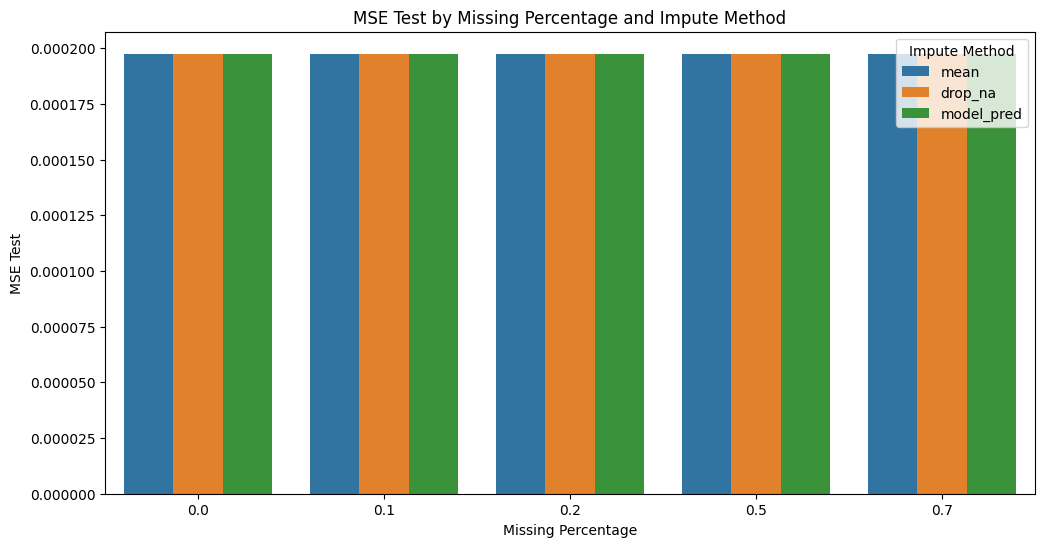

In [25]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a grouped bar plot
df = result_df[result_df['impute_method'] != '0']
plt.figure(figsize=(12, 6))
sns.barplot(x='missing_persentage', y='mse_test', hue='impute_method', data=df)

# Add labels and title
plt.xlabel('Missing Percentage')
plt.ylabel('MSE Test')
plt.title('MSE Test by Missing Percentage and Impute Method')
plt.legend(title='Impute Method')

# Show the plot
plt.show()

# Dataset House Pricing

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from missing_clf import *

house_value_train = 'input/house_pricing/train.csv'
house_value_df = pd.read_csv(house_value_train) 


missing_values = house_value_df.isnull().sum()
cols_with_missing = missing_values[missing_values > 0]
print(cols_with_missing)


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [2]:
len(house_value_df)

1460

In [3]:
# df_full = house_value_df.copy().dropna()
# len(df_full)
missing_percentage = house_value_df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
print(missing_percentage)

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [4]:
remove_cols = missing_percentage[missing_percentage > 10].index
remove_rows = missing_percentage[missing_percentage <= 10].index
df_full = house_value_df.copy().dropna(subset=remove_rows).drop(columns=remove_cols)
len(df_full)

1338

In [5]:
df_full.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [6]:
df_full = df_full.select_dtypes(include=['float64', 'int64'])
df_full.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [7]:
df_full.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [8]:
df_full['GarageArea'].describe()

count    1338.000000
mean      501.449925
std       186.761863
min       160.000000
25%       377.500000
50%       484.000000
75%       583.000000
max      1418.000000
Name: GarageArea, dtype: float64

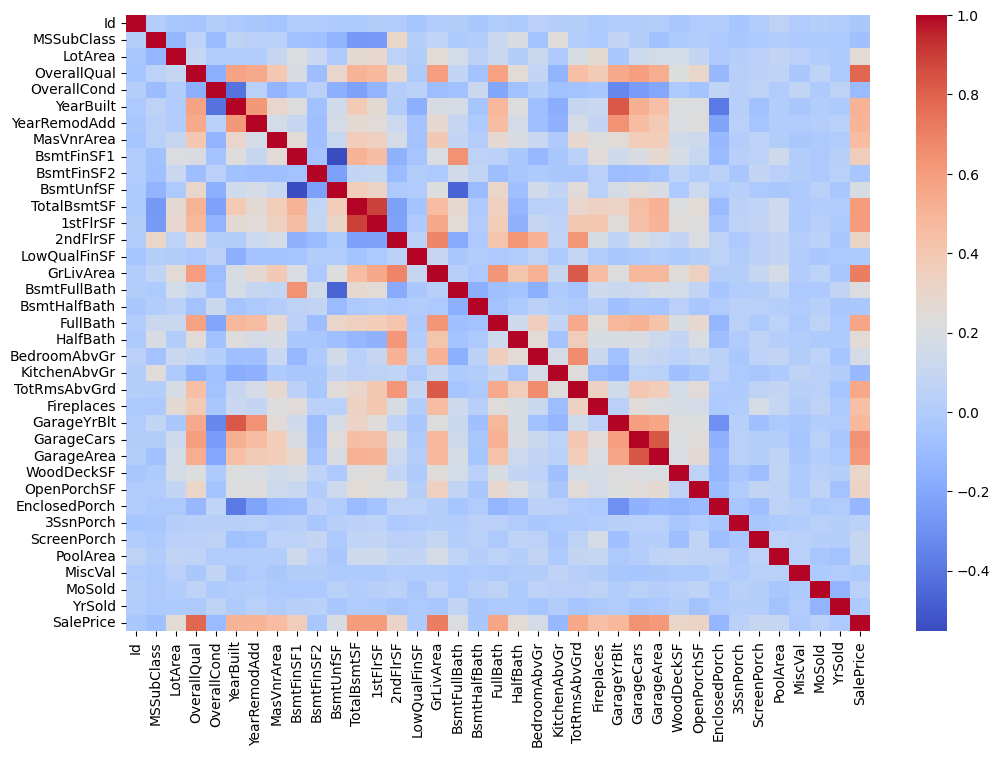

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_full.corr(), cmap='coolwarm')
plt.show()

In [10]:
df_full.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [19]:
# percentage_values = [0.1, 0.3, 0.5, 0.7]
percentage_values = [0.5]
results = []
target_feature = 'SalePrice'
# null_features = wine_df.columns.drop(target_feature)
null_feature = 'MasVnrArea'
role_features = ['OverallQual', 'GrLivArea', 'YearRemodAdd', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'FullBath']
dataset_name = 'House Prices'
for role_feature in role_features:
    for percentage in percentage_values:
        # print(f"----- percentage={percentage} -----")
        # Remove at random
        df_at_random = remove_at_random(df_full, null_feature, percentage, lambda x: x[x[role_feature] > np.median(x[role_feature])])
        acc_at_random = classify_missing_values(df_at_random, null_feature)
        results.append({
            'null feature': null_feature,
            'role_feature': role_feature,
            'dataset': dataset_name,
            'percentage': percentage,
            'method': 'remove_at_random',
            'accuracy': acc_at_random
            })

        # Remove completely at random
        df_completely_at_random = remove_complitly_at_random(df_full, null_feature, percentage)
        acc_completely_at_random = classify_missing_values(df_completely_at_random, null_feature)
        results.append({
            'null feature': null_feature,
            'role_feature': role_feature,
            'dataset': dataset_name,
            'percentage': percentage,
            'method': 'remove_completely_at_random',
            'accuracy': acc_completely_at_random
            })
results = pd.DataFrame(results)
results

(375, 36)
classifier accuracy is 0.84472049689441 - MAR
(936, 36)
classifier accuracy is 0.5 - MCAR/MNAR
(467, 36)
classifier accuracy is 0.7810945273631841 - MAR
(936, 36)
classifier accuracy is 0.5298507462686567 - MCAR/MNAR
(467, 36)
classifier accuracy is 0.7661691542288557 - MAR
(936, 36)
classifier accuracy is 0.4651741293532338 - MCAR/MNAR
(449, 36)
classifier accuracy is 0.7564766839378239 - MAR
(936, 36)
classifier accuracy is 0.5223880597014925 - MCAR/MNAR
(467, 36)
classifier accuracy is 0.8208955223880597 - MAR
(936, 36)
classifier accuracy is 0.4975124378109453 - MCAR/MNAR
(467, 36)
classifier accuracy is 0.7960199004975125 - MAR
(936, 36)
classifier accuracy is 0.5422885572139303 - MCAR/MNAR
(467, 36)
classifier accuracy is 0.7960199004975125 - MAR
(936, 36)
classifier accuracy is 0.4900497512437811 - MCAR/MNAR
(413, 36)
classifier accuracy is 0.8361581920903954 - MAR
(936, 36)
classifier accuracy is 0.4900497512437811 - MCAR/MNAR
(19, 36)
classifier accuracy is 1.0 - MAR

,null feature,role_feature,dataset,percentage,method,accuracy
0,MasVnrArea,OverallQual,House Prices,0.5,remove_at_random,0.844720
1,MasVnrArea,OverallQual,House Prices,0.5,remove_completely_at_random,0.500000
2,MasVnrArea,GrLivArea,House Prices,0.5,remove_at_random,0.781095
3,MasVnrArea,GrLivArea,House Prices,0.5,remove_completely_at_random,0.529851
4,MasVnrArea,YearRemodAdd,House Prices,0.5,remove_at_random,0.766169
5,MasVnrArea,YearRemodAdd,House Prices,0.5,remove_completely_at_random,0.465174
6,MasVnrArea,YearBuilt,House Prices,0.5,remove_at_random,0.756477
7,MasVnrArea,YearBuilt,House Prices,0.5,remove_completely_at_random,0.522388
8,MasVnrArea,BsmtFinSF1,House Prices,0.5,remove_at_random,0.820896
9,MasVnrArea,BsmtFinSF1,House Prices,0.5,remove_completely_at_random,0.497512


<Figure size 1000x600 with 0 Axes>

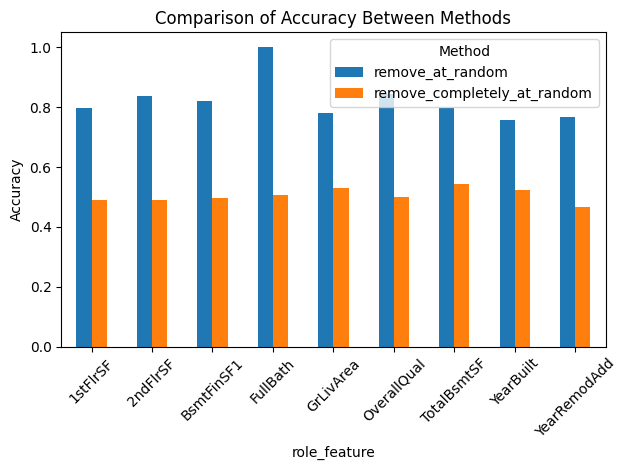

In [20]:
plt.figure(figsize=(10, 6))
results.pivot(index='role_feature', columns='method', values='accuracy').plot(kind='bar')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Between Methods')
plt.legend(title='Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
percentage_values = [i/10 for i in range(1, 10)]
results = []
target_feature = 'SalePrice'
# null_features = wine_df.columns.drop(target_feature)
null_feature = 'MasVnrArea'
role_features = ['YearBuilt']
dataset_name = 'House Prices'
for role_feature in role_features:
    for percentage in percentage_values:
        for seed in range(10):
            # print(f"----- percentage={percentage} -----")
            # Remove at random
            df_at_random = remove_at_random(df_full, null_feature, percentage, lambda x: x[x[role_feature] > np.median(x[role_feature])])
            acc_at_random = classify_missing_values(df_at_random, null_feature, seed=seed)
            results.append({
                'null feature': null_feature,
                'role_feature': role_feature,
                'dataset': dataset_name,
                'percentage': percentage,
                'method': 'remove_at_random',
                'accuracy': acc_at_random,
                'seed': seed
                })

            # Remove completely at random
            df_completely_at_random = remove_complitly_at_random(df_full, null_feature, percentage)
            acc_completely_at_random = classify_missing_values(df_completely_at_random, null_feature, seed=seed)
            results.append({
                'null feature': null_feature,
                'role_feature': role_feature,
                'dataset': dataset_name,
                'percentage': percentage,
                'method': 'remove_completely_at_random',
                'accuracy': acc_completely_at_random,
                'seed': seed
                })
results = pd.DataFrame(results)
results

(89, 36)
classifier accuracy is 0.717948717948718 - MAR
(186, 36)
classifier accuracy is 0.475 - MCAR/MNAR
(89, 36)
classifier accuracy is 0.6923076923076923 - MCAR/MNAR
(186, 36)
classifier accuracy is 0.4375 - MCAR/MNAR
(89, 36)
classifier accuracy is 0.717948717948718 - MAR
(186, 36)
classifier accuracy is 0.4 - MCAR/MNAR
(89, 36)
classifier accuracy is 0.717948717948718 - MAR
(186, 36)
classifier accuracy is 0.4125 - MCAR/MNAR
(89, 36)
classifier accuracy is 0.6666666666666666 - MCAR/MNAR
(186, 36)
classifier accuracy is 0.5375 - MCAR/MNAR
(89, 36)
classifier accuracy is 0.6923076923076923 - MCAR/MNAR
(186, 36)
classifier accuracy is 0.4375 - MCAR/MNAR
(89, 36)
classifier accuracy is 0.6410256410256411 - MCAR/MNAR
(186, 36)
classifier accuracy is 0.5375 - MCAR/MNAR
(89, 36)
classifier accuracy is 0.6923076923076923 - MCAR/MNAR
(186, 36)
classifier accuracy is 0.475 - MCAR/MNAR
(89, 36)
classifier accuracy is 0.717948717948718 - MAR
(186, 36)
classifier accuracy is 0.5125 - MCAR/MNA

,null feature,role_feature,dataset,percentage,method,accuracy,seed
0,MasVnrArea,YearBuilt,House Prices,0.1,remove_at_random,0.717949,0
1,MasVnrArea,YearBuilt,House Prices,0.1,remove_completely_at_random,0.475000,0
2,MasVnrArea,YearBuilt,House Prices,0.1,remove_at_random,0.692308,1
3,MasVnrArea,YearBuilt,House Prices,0.1,remove_completely_at_random,0.437500,1
4,MasVnrArea,YearBuilt,House Prices,0.1,remove_at_random,0.717949,2
...,...,...,...,...,...,...,...
175,MasVnrArea,YearBuilt,House Prices,0.9,remove_completely_at_random,0.506173,7
176,MasVnrArea,YearBuilt,House Prices,0.9,remove_at_random,0.953890,8
177,MasVnrArea,YearBuilt,House Prices,0.9,remove_completely_at_random,0.481481,8
178,MasVnrArea,YearBuilt,House Prices,0.9,remove_at_random,0.951009,9


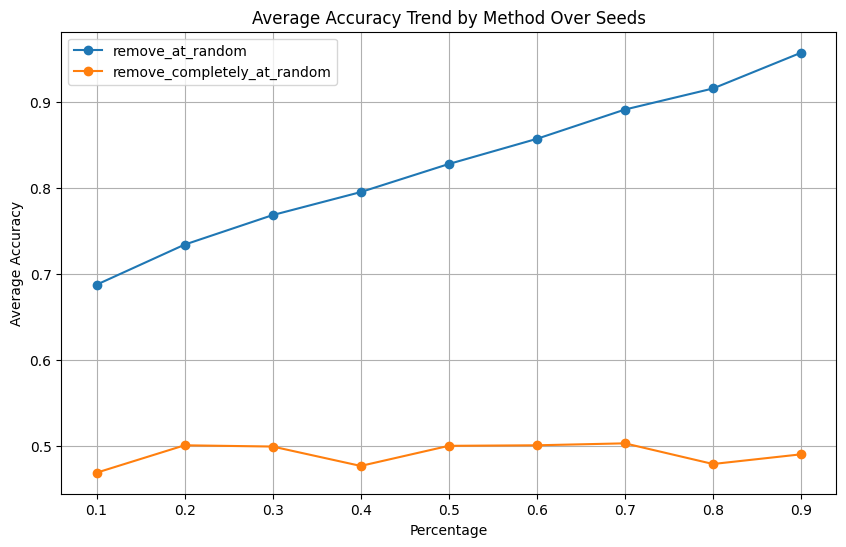

In [22]:
df_mean = results.groupby(['percentage', 'method'])['accuracy'].mean().reset_index()
    
plt.figure(figsize=(10, 6))
for method in df_mean['method'].unique():
    subset = df_mean[df_mean['method'] == method]
    plt.plot(subset['percentage'], subset['accuracy'], marker='o', label=method)
plt.xlabel('Percentage')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy Trend by Method Over Seeds')
plt.legend()
plt.grid()
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

X = df_full.drop(columns=[target_feature])
y = df_full[target_feature]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'fit_intercept': [True, False],
}

# Initialize the Linear Regression model
predictor = LinearRegression()

# Initialize the grid search
grid_search = GridSearchCV(estimator=predictor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_r2 = grid_search.best_score_
print(f"R2 score: {best_r2}")

# Evaluate the best model
baseline_acc = best_model.score(X_test, y_test)
print(f"Accuracy: {baseline_acc}")

Best Hyperparameters: {'fit_intercept': False}
R2 score: 0.6623380144348756
Accuracy: 0.7979438315500915


In [48]:
from sklearn.ensemble import RandomForestRegressor
percentage_values = [0.8]
results = []
target_feature = 'SalePrice'
# null_features = wine_df.columns.drop(target_feature)
null_feature = 'OverallQual'
role_features = ['GrLivArea', 'YearRemodAdd', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'FullBath']
dataset_name = 'House Prices'
for role_feature in role_features:
    for percentage in percentage_values:
        for seed in range(10):
            # Remove at random
            df_at_random = remove_at_random(df_full, null_feature, percentage, lambda x: x[x[role_feature] > np.median(x[role_feature])])
            
            # Drop rows
            df_at_random = df_at_random.dropna()
            X = df_at_random.drop(columns=[target_feature])
            y = df_at_random[target_feature]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
            predictor = LinearRegression(**best_params)
            acc_drop_rows = predictor.fit(X_train, y_train).score(X_test, y_test)
            results.append({
                'null feature': null_feature,
                'role_feature': role_feature,
                'dataset': dataset_name,
                'percentage': percentage,
                'seed': seed,
                'method': 'drop_rows',
                'accuracy': acc_drop_rows,
                })
            
            # Drop column
            df_at_random = df_at_random.drop(columns=[null_feature])
            X = df_at_random.drop(columns=[target_feature])
            y = df_at_random[target_feature]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
            predictor = LinearRegression(**best_params)
            acc_drop_column = predictor.fit(X_train, y_train).score(X_test, y_test)
            results.append({
                'null feature': null_feature,
                'role_feature': role_feature,
                'dataset': dataset_name,
                'percentage': percentage,
                'seed': seed,
                'method': 'drop_column',
                'accuracy': acc_drop_column,
                })

results = pd.DataFrame(results)
results

,null feature,role_feature,dataset,percentage,seed,method,accuracy
0,OverallQual,GrLivArea,House Prices,0.8,0,drop_rows,0.785882
1,OverallQual,GrLivArea,House Prices,0.8,0,drop_column,0.742707
2,OverallQual,GrLivArea,House Prices,0.8,1,drop_rows,0.666222
3,OverallQual,GrLivArea,House Prices,0.8,1,drop_column,0.606067
4,OverallQual,GrLivArea,House Prices,0.8,2,drop_rows,-0.005808
...,...,...,...,...,...,...,...
155,OverallQual,FullBath,House Prices,0.8,7,drop_column,0.816778
156,OverallQual,FullBath,House Prices,0.8,8,drop_rows,0.860257
157,OverallQual,FullBath,House Prices,0.8,8,drop_column,0.813930
158,OverallQual,FullBath,House Prices,0.8,9,drop_rows,0.846818


In [49]:
results['accuracy'].describe()

count    160.000000
mean       0.759961
std        0.167618
min       -0.096949
25%        0.763343
50%        0.805984
75%        0.842230
max        0.882929
Name: accuracy, dtype: float64

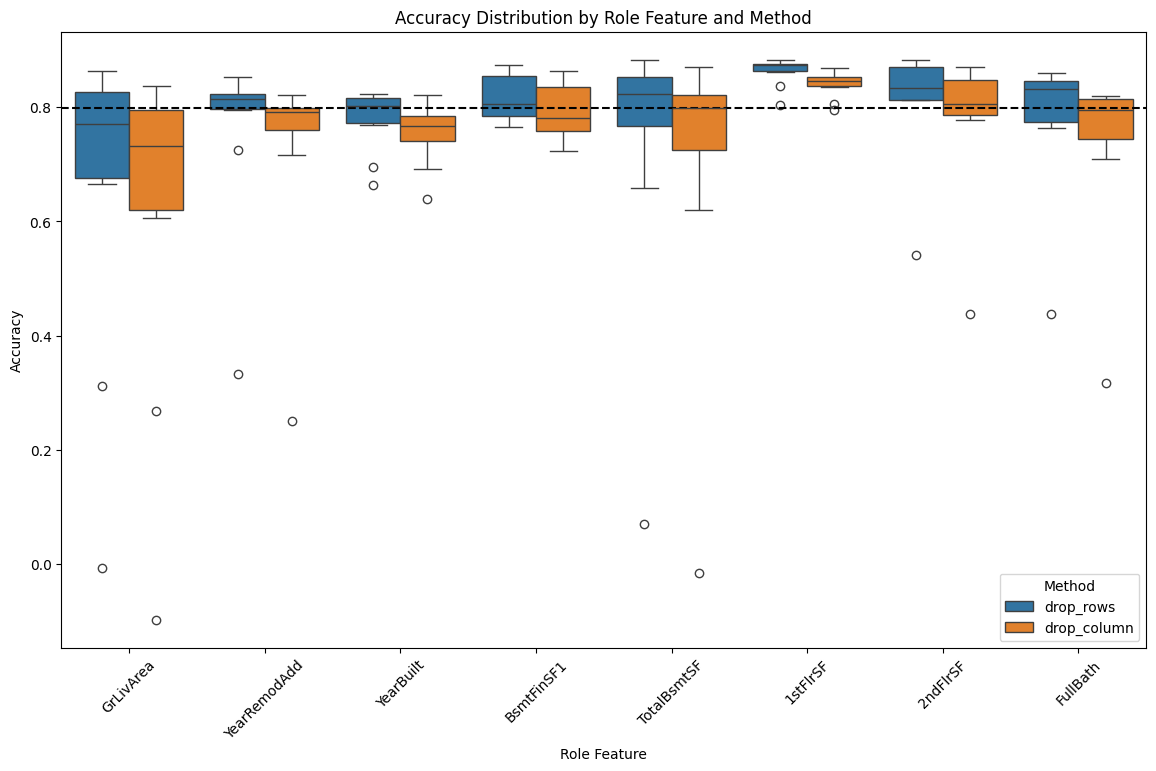

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the results for the two methods
methods_to_plot = ['drop_rows', 'drop_column']
filtered_results = results[results['method'].isin(methods_to_plot)]

# Create box plots for each role_feature
plt.figure(figsize=(14, 8))
sns.boxplot(x='role_feature', y='accuracy', hue='method', data=filtered_results)
plt.axhline(y=baseline_acc, color='black', linestyle='--')
plt.title('Accuracy Distribution by Role Feature and Method')
plt.xlabel('Role Feature')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend(title='Method')
plt.show()

In [ ]:
missing_feature = 'YearBuilt'
role_feature = 'GarageYrBlt'

# new_df = remove_at_random(df_full, missing_feature, 0.2, lambda x: x[x[role_feature] > 2000])
new_df = remove_complitly_at_random(df_full, missing_feature, 0.3)
# new_df = remove_not_at_random(df_full, missing_feature, 0.3, lambda x: x[x[role_feature] > 2000], role_feature)
new_df[missing_feature].isnull().sum()


In [156]:
# new_df.to_csv('df.csv', index=False)


In [ ]:
%reload_ext autoreload
%autoreload 2
from missing_clf import classify_missing_values

acc = classify_missing_values(new_df, missing_feature)
acc

In [158]:
# The Melbourne data has some missing values (some houses for which some variables weren't recorded.)
# We'll learn to handle missing values in a later tutorial.  
# Your Iowa data doesn't have missing values in the columns you use. 
# So we will take the simplest option for now, and drop houses from our data. 
# Don't worry about this much for now, though the code is:

# dropna drops missing values (think of na as "not available")
house_value_df = house_value_df.dropna(axis=0)

There are many ways to select a subset of your data. The [Pandas Micro-Course](https://www.kaggle.com/learn/pandas) covers these in more depth, but we will focus on two approaches for now.

1. Dot notation, which we use to select the "prediction target"
2. Selecting with a column list, which we use to select the "features" 

## Selecting The Prediction Target 
You can pull out a variable with **dot-notation**.  This single column is stored in a **Series**, which is broadly like a DataFrame with only a single column of data.  

We'll use the dot notation to select the column we want to predict, which is called the **prediction target**. By convention, the prediction target is called **y**. So the code we need to save the house prices in the Melbourne data is

In [159]:
y_train = house_value_df.SalePrice

# Choosing "Features"
The columns that are inputted into our model (and later used to make predictions) are called "features." In our case, those would be the columns used to determine the home price. Sometimes, you will use all columns except the target as features. Other times you'll be better off with fewer features. 

For now, we'll build a model with only a few features. Later on you'll see how to iterate and compare models built with different features.

We select multiple features by providing a list of column names inside brackets. Each item in that list should be a string (with quotes).

Here is an example:

In [160]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

Let's quickly review the data we'll be using to predict house prices using the `describe` method and the `head` method, which shows the top few rows.

In [ ]:
X.describe()

In [ ]:
X.head()

Visually checking your data with these commands is an important part of a data scientist's job.  You'll frequently find surprises in the dataset that deserve further inspection.

---
# Building Your Model

You will use the **scikit-learn** library to create your models.  When coding, this library is written as **sklearn**, as you will see in the sample code. Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames. 

The steps to building and using a model are:
* **Define:** What type of model will it be?  A decision tree?  Some other type of model? Some other parameters of the model type are specified too.
* **Fit:** Capture patterns from provided data. This is the heart of modeling.
* **Predict:** Just what it sounds like
* **Evaluate**: Determine how accurate the model's predictions are.

Here is an example of defining a decision tree model with scikit-learn and fitting it with the features and target variable.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y_train)

Many machine learning models allow some randomness in model training. Specifying a number for `random_state` ensures you get the same results in each run. This is considered a good practice. You use any number, and model quality won't depend meaningfully on exactly what value you choose.

We now have a fitted model that we can use to make predictions.

In practice, you'll want to make predictions for new houses coming on the market rather than the houses we already have prices for. But we'll make predictions for the first few rows of the training data to see how the predict function works.


In [ ]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

# Your Turn
Try it out yourself in the **[Model Building Exercise](https://www.kaggle.com/kernels/fork/400771)**

---
**[Machine Learning Home Page](https://www.kaggle.com/learn/intro-to-machine-learning)**





*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum) to chat with other Learners.*